In [49]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
path='./chromedriver.exe'
driver = webdriver.Chrome(service=Service(path))

import time
 
driver.get('https://www.instagram.com')
time.sleep(2)

def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url


In [50]:
word = '워케이션'
url = insta_searching(word)
driver.get(url)

In [51]:
def select_first(driver):
    first = driver.find_element(By.CSS_SELECTOR, "div._aagw")
    first.click()
    time.sleep(5)
 
select_first(driver)

In [52]:
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    # 현재 페이지 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    #print(soup.select('div._a9zs'))
    # 본문 내용 가져오기
    content = soup.select('div._a9zs')[0].text
    content = unicodedata.normalize('NFC', content)
    
    #본문 내용에서 해시태그 가져오기(정규식 활용)
    tags = re.findall(r'#[^Ws#,\\]+', content)
    #tags = re.findall(r'#[A-Za-z]+', content)
    # 작성일자 정보 가져오기
    # time class 안에 datetime이라는 항목(년월일시분초 있음)에서 10개 string만 보겠다라는 뜻
    #date = soup.select('time._aaqe')
    
    # 수집한 정보 저장하기
    #data = [tags]
    return tags

In [53]:
def move_next(driver):
    right = driver.find_element(By.CSS_SELECTOR, "div._aaqg._aaqh")
    right.click()
    time.sleep(2)

In [54]:
data = []

In [55]:
for i in range(1000) :
    #print(tmp)
    tmp = get_content(driver)
    data.extend(tmp)
    if i % 100 == 0 :
        print(i)
    move_next(driver)

0
100
200
300
400
500
600
700
800
900


In [21]:
'#카누' in data

False

In [67]:
for i in range(len(data)) :
    data[i] = data[i].strip()
    if '살기' in data[i] or '카누' in data[i] or '워케이션' in data[i] or 'workation' in data[i] or '순천' in data[i] or data[i] == '#디지털노마드' : #or data[i] == '#work' or data[i] == '#vacation' or data[i]:
        data.remove(data[i])
    elif len(data[i]) == 1 :
        print(data[i])
        data.remove(data[i])

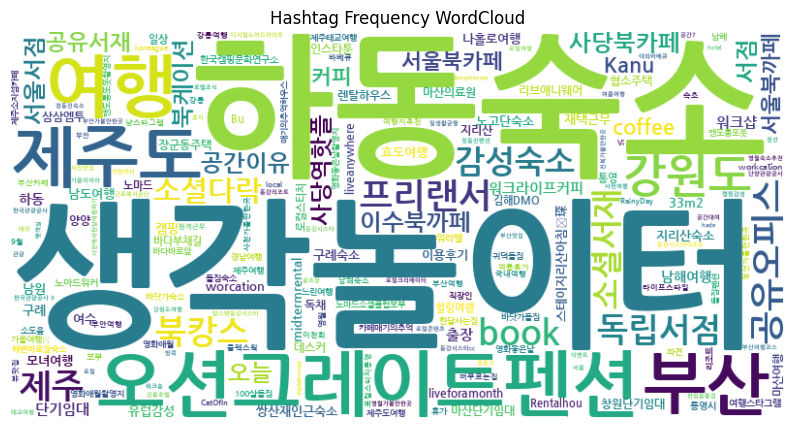

In [68]:
from sentence_transformers import SentenceTransformer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 예시 해시태그 데이터 (사용자 데이터로 대체 가능)
hashtags_cleaned = [tag[1:] for tag in data]  # '#' 제거

# 단어 빈도 계산
hashtag_counts = Counter(hashtags_cleaned)

# 한국어 폰트 설정 (NanumGothic 사용 예시, 시스템에 설치된 폰트 경로로 대체 가능)
font_path = 'C:/Users/gk503/Desktop/자료/해커톤/DIVE 2024/tmp/NanumGothic-Bold.ttf'  # 시스템에 설치된 한국어 폰트 경로

# WordCloud 생성
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    font_path=font_path
).generate_from_frequencies(hashtag_counts)

# WordCloud 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtag Frequency WordCloud')
plt.show()


In [21]:
# 클러스터별로 해시태그 묶기
clustered_hashtags = {i: [] for i in range(num_clusters)}
for i, label in enumerate(labels):
    clustered_hashtags[label].append(hashtags_cleaned[i])

# 각 클러스터의 해시태그를 빈도 기반으로 WordCloud로 시각화
plt.figure(figsize=(18, 10))
for cluster_id, words in clustered_hashtags.items():
    # 클러스터별 빈도 계산
    cluster_hashtag_counts = Counter(words)
    
    # WordCloud 생성
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate_from_frequencies(cluster_hashtag_counts)
    
    # WordCloud 시각화
    plt.subplot(2, num_clusters // 2, cluster_id + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster_id + 1}')

plt.tight_layout()
plt.show()

OSError: cannot open resource

<Figure size 1800x1000 with 0 Axes>

In [12]:
# 각 클러스터의 해시태그를 빈도 기반으로 WordCloud로 시각화
plt.figure(figsize=(18, 10))
for cluster_id, words in clustered_hashtags.items():
    # 클러스터별 빈도 계산
    cluster_hashtag_counts = Counter(words)
    
    # WordCloud 생성
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cluster_hashtag_counts)
    
    # WordCloud 시각화
    plt.subplot(2, num_clusters // 2, cluster_id + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster_id + 1}')

plt.tight_layout()
plt.show()


ValueError: Number of columns must be a positive integer, not 0

<Figure size 1800x1000 with 0 Axes>